In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import hiive.mdptoolbox as mdptoolbox

In [ ]:
for p in np.arange(0,1, 0.1):
    fig, axs = plt.subplots(2, figsize=(10,5), tight_layout=True)
    print(p)
    for size in [3, 5, 7, 100, 300]:
        P, R = mdptoolbox.example.forest(size, p=p)
        vi = mdptoolbox.mdp.ValueIteration(P, R, 0.99)
        run_stats = vi.run()
        axs[0].plot(np.cumsum([x["Reward"] for x in run_stats]), label=size)
        axs[0].set_title("CumulativeReward")
        axs[0].legend()
        axs[1].plot([x["Mean V"] for x in run_stats], label=size)
        axs[1].set_title("CumulativeReward")
        axs[1].legend()
    plt.show()
    # vi.policy # result is (0, 0, 0)
    

In [36]:
run_stats[0]

{'State': None,
 'Action': None,
 'Reward': 4.0,
 'Error': 4.0,
 'Time': 0.0008609294891357422,
 'Max V': 4.0,
 'Mean V': 1.002,
 'Iteration': 1}

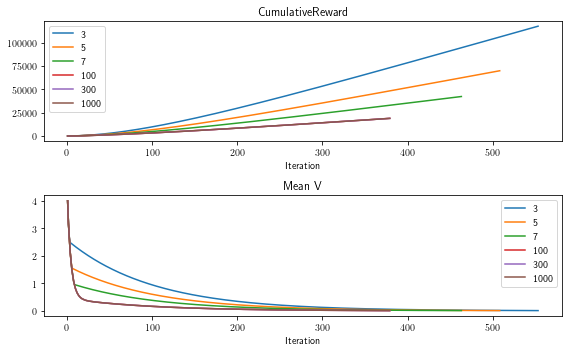

In [56]:
plt.rcParams['text.usetex'] = True
fig, axs = plt.subplots(2, figsize=(8,5), tight_layout=True)
for size in [3, 5, 7, 100, 300, 1000]:
    P, R = mdptoolbox.example.forest(size, p=0.2)
    vi = mdptoolbox.mdp.ValueIteration(P, R, 0.99, epsilon_optimal=False, max_iter=1e10)
    run_stats = vi.run()
    axs[0].plot([x["Iteration"] for x in run_stats], np.cumsum([x["Reward"] for x in run_stats]), label=size)
    axs[0].set_title("CumulativeReward")
    axs[0].legend()
    axs[0].set_xlabel("Iteration")
    axs[1].plot([x["Iteration"] for x in run_stats], [x["Error"] for x in run_stats], label=size)
    axs[1].set_title("Mean V")
    axs[1].legend()
    axs[1].set_xlabel("Iteration")
plt.savefig("figures/forest_management_picking_size.png")

In [ ]:
plt.rcParams['text.usetex'] = True
fig, axs = plt.subplots(2, figsize=(8,5), tight_layout=True)
for size in [3, 5, 7, 100, 300, 1000]:
    P, R = mdptoolbox.example.forest(size, p=0.2)
    vi = mdptoolbox.mdp.ValueIteration(P, R, 0.99, epsilon_optimal=False, max_iter=1e10)
    run_stats = vi.run()
    axs[0].plot([x["Iteration"] for x in run_stats], np.cumsum([x["Reward"] for x in run_stats]), label=size)
    axs[0].set_title("CumulativeReward")
    axs[0].legend()
    axs[0].set_xlabel("Iteration")
    axs[1].plot([x["Iteration"] for x in run_stats], [x["Error"] for x in run_stats], label=size)
    axs[1].set_title("Mean V")
    axs[1].legend()
    axs[1].set_xlabel("Iteration")
plt.savefig("figures/forest_management_picking_size.png")

In [59]:
from forest_management.forest_management import forest_management_problem

In [61]:
P, R = forest_management_problem(0)

In [62]:
run_stats[0]

{'State': None,
 'Action': None,
 'Reward': 4.0,
 'Error': 4.0,
 'Time': 0.0005660057067871094,
 'Max V': 4.0,
 'Mean V': 1.002,
 'Iteration': 1}

# VI

Small
Large


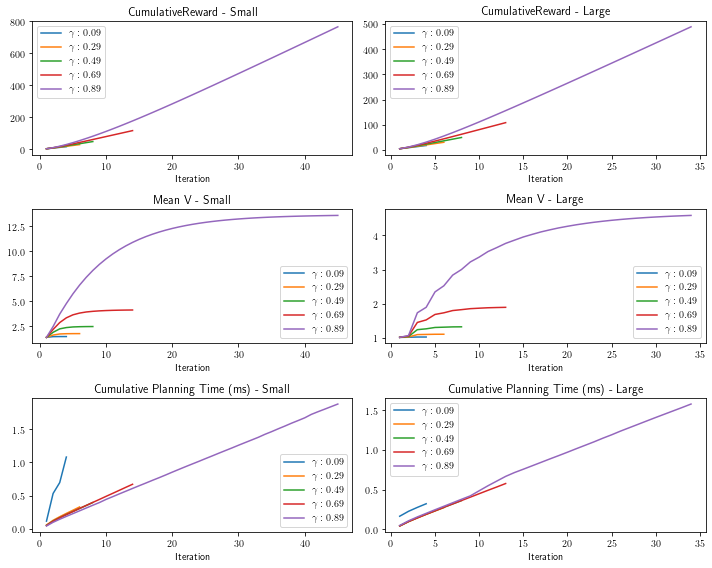

In [88]:
plt.rcParams['text.usetex'] = True
fig, axs = plt.subplots(3, 2, figsize=(10,8), tight_layout=True)
size_title = {0: "Small", 1:"Large"}

for size in [0, 1]:
    P, R = forest_management_problem(size)
    for gamma in np.arange(0.09, 0.99, 0.2):
        gamma_label = f"$\gamma: {round(gamma, 2)}$"
        vi = mdptoolbox.mdp.ValueIteration(P, R, gamma, epsilon_optimal=False, max_iter=1e10)
        run_stats = vi.run()
        axs[0][size].plot([x["Iteration"] for x in run_stats], np.cumsum([x["Reward"] for x in run_stats]), label=gamma_label)
        axs[0][size].set_title(f"CumulativeReward - {size_title[size]}")
        axs[0][size].legend()
        axs[0][size].set_xlabel("Iteration")
        axs[1][size].plot([x["Iteration"] for x in run_stats], [x["Mean V"] for x in run_stats], label=gamma_label)
        axs[1][size].set_title(f"Mean V - {size_title[size]}")
        axs[1][size].legend()
        axs[1][size].set_xlabel("Iteration")
        # axs[2][size].plot([x["Iteration"] for x in run_stats], np.cumsum([x["Time"] for x in run_stats]), label=gamma_label)
        axs[2][size].plot([x["Iteration"] for x in run_stats], [x["Time"]*1e3 for x in run_stats], label=gamma_label)
        axs[2][size].set_title(f"Cumulative Planning Time (ms) - {size_title[size]}")
        axs[2][size].legend()
        axs[2][size].set_xlabel("Iteration")
plt.savefig("figures/forest_management_vi_gamma", dpi=500)

In [96]:
pi.thresh

1.0111111111111113e-08

# PI

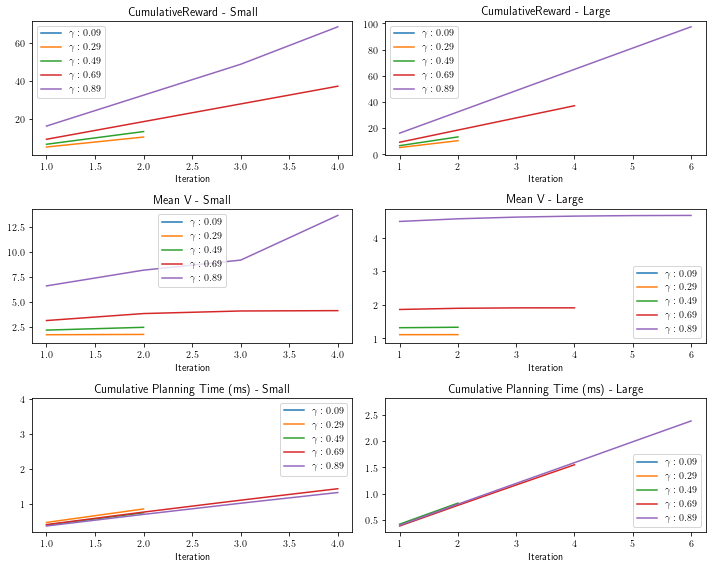

In [99]:
plt.rcParams['text.usetex'] = True
fig, axs = plt.subplots(3, 2, figsize=(10,8), tight_layout=True)
size_title = {0: "Small", 1:"Large"}

for size in [0, 1]:
    P, R = forest_management_problem(size)
    for gamma in np.arange(0.09, 0.99, 0.2):
        gamma_label = f"$\gamma: {round(gamma, 2)}$"
        pi = mdptoolbox.mdp.PolicyIteration(P, R, gamma, max_iter=1e10)
        run_stats = pi.run()
        axs[0][size].plot([x["Iteration"] for x in run_stats], np.cumsum([x["Reward"] for x in run_stats]), label=gamma_label)
        axs[0][size].set_title(f"CumulativeReward - {size_title[size]}")
        axs[0][size].legend()
        axs[0][size].set_xlabel("Iteration")
        axs[1][size].plot([x["Iteration"] for x in run_stats], [x["Mean V"] for x in run_stats], label=gamma_label)
        axs[1][size].set_title(f"Mean V - {size_title[size]}")
        axs[1][size].legend()
        axs[1][size].set_xlabel("Iteration")
        # axs[2][size].plot([x["Iteration"] for x in run_stats], np.cumsum([x["Time"] for x in run_stats]), label=gamma_label)
        axs[2][size].plot([x["Iteration"] for x in run_stats], [x["Time"]*1e3 for x in run_stats], label=gamma_label)
        axs[2][size].set_title(f"Cumulative Planning Time (ms) - {size_title[size]}")
        axs[2][size].legend()
        axs[2][size].set_xlabel("Iteration")
plt.savefig("figures/forest_management_pi_gamma", dpi=500)

# Q-Learning

## Epsilon

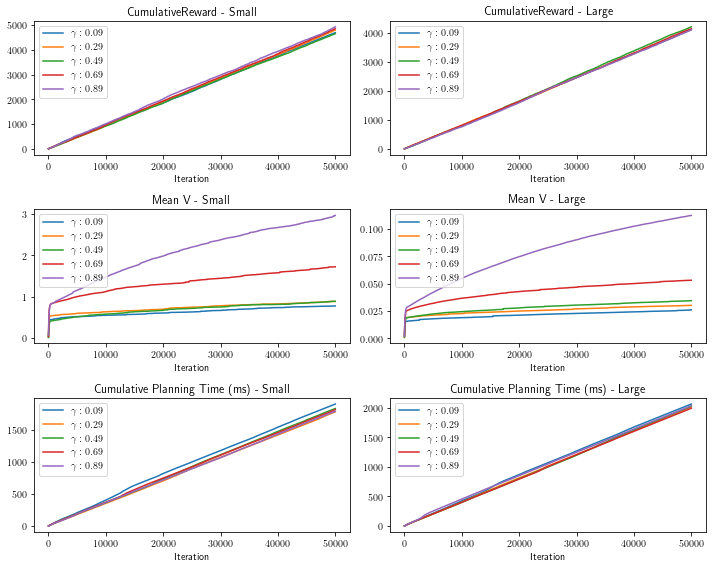

In [103]:
plt.rcParams['text.usetex'] = True
fig, axs = plt.subplots(3, 2, figsize=(10,8), tight_layout=True)
size_title = {0: "Small", 1:"Large"}

grid_points = np.arange(0.09, 0.99, 0.2)

for size in [0, 1]:
    P, R = forest_management_problem(size)
    for gamma in grid_points:
        gamma_label = f"$\gamma: {round(gamma, 2)}$"
        pi = mdptoolbox.mdp.QLearning(P, R, 0.69, n_iter=50000)
        run_stats = pi.run()
        axs[0][size].plot([x["Iteration"] for x in run_stats], np.cumsum([x["Reward"] for x in run_stats]), label=gamma_label)
        axs[0][size].set_title(f"CumulativeReward - {size_title[size]}")
        axs[0][size].legend()
        axs[0][size].set_xlabel("Iteration")
        axs[1][size].plot([x["Iteration"] for x in run_stats], [x["Mean V"] for x in run_stats], label=gamma_label)
        axs[1][size].set_title(f"Mean V - {size_title[size]}")
        axs[1][size].legend()
        axs[1][size].set_xlabel("Iteration")
        # axs[2][size].plot([x["Iteration"] for x in run_stats], np.cumsum([x["Time"] for x in run_stats]), label=gamma_label)
        axs[2][size].plot([x["Iteration"] for x in run_stats], [x["Time"]*1e3 for x in run_stats], label=gamma_label)
        axs[2][size].set_title(f"Cumulative Planning Time (ms) - {size_title[size]}")
        axs[2][size].legend()
        axs[2][size].set_xlabel("Iteration")
plt.savefig("figures/forest_management_q_learning_gamma", dpi=500)

In [ ]:
plt.rcParams['text.usetex'] = True
fig, axs = plt.subplots(3, 2, figsize=(10,8), tight_layout=True)
size_title = {0: "Small", 1:"Large"}

grid_points = np.arange(0.09, 0.99, 0.2)

for size in [0, 1]:
    P, R = forest_management_problem(size)
    for gamma in grid_points:
        gamma_label = f"$\gamma: {round(gamma, 2)}$"
        pi = mdptoolbox.mdp.QLearning(P, R, gamma, n_iter=50000)
        run_stats = pi.run()
        axs[0][size].plot([x["Iteration"] for x in run_stats], np.cumsum([x["Reward"] for x in run_stats]), label=gamma_label)
        axs[0][size].set_title(f"CumulativeReward - {size_title[size]}")
        axs[0][size].legend()
        axs[0][size].set_xlabel("Iteration")
        axs[1][size].plot([x["Iteration"] for x in run_stats], [x["Mean V"] for x in run_stats], label=gamma_label)
        axs[1][size].set_title(f"Mean V - {size_title[size]}")
        axs[1][size].legend()
        axs[1][size].set_xlabel("Iteration")
        # axs[2][size].plot([x["Iteration"] for x in run_stats], np.cumsum([x["Time"] for x in run_stats]), label=gamma_label)
        axs[2][size].plot([x["Iteration"] for x in run_stats], [x["Time"]*1e3 for x in run_stats], label=gamma_label)
        axs[2][size].set_title(f"Cumulative Planning Time (ms) - {size_title[size]}")
        axs[2][size].legend()
        axs[2][size].set_xlabel("Iteration")
plt.savefig("figures/forest_management_q_learning_gamma", dpi=500)